<a href="https://colab.research.google.com/github/eunnjji/MultiCampus-EmpAcademy/blob/main/project1/seoul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# drive.mount('/gdrive', force_remount=True)
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# OS 
!cat /etc/issue.net

Ubuntu 18.04.5 LTS


In [ ]:
!ls 'drive/MyDrive/corona'

'서울시 코로나19 확진자 현황.csv'    seoul.ipynb
'서울시 코로나19 확진자 현황.json'


In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
seoul = pd.read_csv('drive/MyDrive/seoul/서울시 코로나19 확진자 현황.csv',encoding='utf-8')
seoul

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,20338,21.01.04.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
1,20337,21.01.04.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
2,20336,21.01.04.,NaN,NaN,NaN,서대문구,우크라이나,해외유입,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
3,20335,21.01.04.,NaN,NaN,NaN,노원구,NaN,타시도 확진자 접촉(경기이천시물류센터관련),NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
4,20334,21.01.04.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20333,5,20.1.31.,NaN,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20334,4,20.1.30.,NaN,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20335,3,20.1.30.,NaN,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20336,2,20.1.30.,NaN,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y


In [ ]:
def rename_date(d):
    if len(d) == 9:
        return d[:2]+'-'+d[3:5]+'-'+d[6:8]
    else:
        return d[:2]+'-'+'0'+d[3:4]+'-'+d[5:7]

seoul['확진일'] = seoul['확진일'].astype(str)
seoul['확진일'] = seoul['확진일'].apply(rename_date)

In [ ]:
seoul

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,20338,21-01-04,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
1,20337,21-01-04,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
2,20336,21-01-04,NaN,NaN,NaN,서대문구,우크라이나,해외유입,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
3,20335,21-01-04,NaN,NaN,NaN,노원구,NaN,타시도 확진자 접촉(경기이천시물류센터관련),NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
4,20334,21-01-04,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20333,5,20-01-31,NaN,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20334,4,20-01-30,NaN,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20335,3,20-01-30,NaN,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y
20336,2,20-01-30,NaN,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2021-01-04 10:08,2021-01-04 11:31,Y


## 기념일 이후 확진자 추이




In [ ]:
## 어떤 요일에 코로나가 제일 많이 발생했고, 제일 적게 발생했나 분석

## 사회적거리두기 단계상향 공식적인 발표후 코로나 확진자의 수 변화추이


In [ ]:
seoul2=seoul[['확진일','지역','연번']]
seoul2

,확진일,지역,연번
0,21-01-04,영등포구,20338
1,21-01-04,타시도,20337
2,21-01-04,서대문구,20336
3,21-01-04,노원구,20335
4,21-01-04,영등포구,20334
...,...,...,...
20333,20-01-31,성북구,5
20334,20-01-30,마포구,4
20335,20-01-30,종로구,3
20336,20-01-30,중랑구,2


In [ ]:
seoul2.groupby('지역')['연번'].count()

지역
강남구       966
강동구       609
강북구       503
강서구      1390
관악구      1054
광진구       487
구로구       656
금천구       339
기타       1450
노원구       852
노원구         1
도봉구       595
동대문구      694
동대문구        1
동작구       869
마포구       723
서대문구      538
서초구       850
성동구       482
성북구       851
송파구      1175
양천구       769
영등포구      745
용산구       431
은평구       812
종로구       440
중구        293
중랑구       836
타시도       870
Name: 연번, dtype: int64

In [ ]:
def rename_date_all(d):
    if len(d) == 9:
        return d[:2]+d[3:5]+d[6:8]
    else:
        return d[:2]+'0'+d[3:4]+d[5:7]
    
test['확진일'] = test['확진일'].astype(str)
test['확진일자'] = test['확진일'].apply(rename_date_all)
# ex) 21.01.04. = 210104 ,,, 20.12.23. = 201223
test.head()

,연번,확진일,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,확진일자
0,20338,21.01.04.,영등포구,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,210104
1,20337,21.01.04.,타시도,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,210104
2,20336,21.01.04.,서대문구,우크라이나,해외유입,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,210104
3,20335,21.01.04.,노원구,NaN,타시도 확진자 접촉(경기이천시물류센터관련),NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,210104
4,20334,21.01.04.,영등포구,NaN,감염경로 조사중,NaN,NaN,2021-01-05 10:49,2021-01-05 10:49,Y,210104


In [ ]:
bydate=test.groupby('확진일자').count()
bydate

,연번,확진일,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부
확진일자,,,,,,,,,,
200124,1,1,1,1,1,1,1,1,1,1
200130,3,3,3,2,3,3,3,3,3,3
200131,3,3,3,0,3,3,3,3,3,3
200216,2,2,2,0,2,2,2,2,2,2
200219,2,2,2,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
201231,359,359,359,1,359,0,0,359,359,359
210101,249,249,248,5,249,0,0,249,249,249
210102,201,201,201,2,201,0,0,201,201,201


## 나이별 확진자 현황 분류


In [ ]:
seoul = pd.read_csv('drive/MyDrive/corona/서울시 코로나19 확진자 현황.csv',encoding='utf-8')
seoul.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

In [ ]:
seoul.isna().sum()

연번          0
확진일         0
환자번호    20338
국적      20338
환자정보    20338
지역         57
여행력     19662
접촉력         0
조치사항    20338
상태       8270
이동경로     4449
등록일         0
수정일         0
노출여부        0
dtype: int64

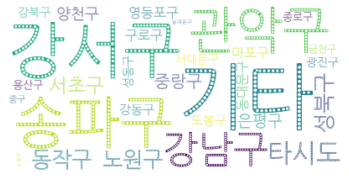

In [ ]:
!pip install wordcloud
import matplotlib.font_manager as fm  # 폰트 관련 용도
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt

!apt-get update -qq
!apt-get install fonts-nanum* -qq
plt.rcParams['font.family'] = 'NanumSquareL'# '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False

region = seoul.drop(['환자번호','국적','조치사항','환자정보'],axis=1)
region

## 코로나 발생 이후 ~ 1월 4일까지 전체 지역별 확진자
region_len = region.groupby('지역')['연번'].count().sum()
region_count = region.groupby('지역')['연번'].count()
region_count = pd.DataFrame(region_count)

wc = WordCloud(background_color='white',font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf')
frequencies = region_count['연번']
wordcloud_image = wc.generate_from_frequencies(frequencies)
# 생성한 워드 클라우드 이미지를 화면에 표시
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.show()
